In [240]:
# -*- coding: utf-8 -*-
"""
Created on Nov 14  2024
author: Dragoljub Perisic
postupak koji generiÅ¡e fajl za primer
1. 
https://minorplanetcenter.net/db_search/
primer sadrÅ¾i objekte
upit na sajtu
PEa [1,6-4,2]
PEq>1.6
Apsolutna magnituda PEH [11-12]
sa sajta, posle upita, prebaceno u Excel
pa posle iz Excela u CSV (DOS)
file name :
set003MBA1149Objekata11do12mag.csv
!
primer sadrÅ¾i objekte
upit na sajtu
PEa [1,6-10]
PEq>1.6
Apsolutna magnituda PEH [11-13]
sa sajta, posle upita, prebaceno u Excel
pa posle iz Excela u CSV (DOS)
file name :
set003MBA6253Objekata11do13mag.csv
!
ver 0.8 proradila distribucija (ovde je ostalo staro)
ver 0.85 proradila distribucija (ovde je samo bitno) 25.11.2024.
ver 0.86 ... treba : period u puno klastera, a vs i , reyonatni gepovi , labele u slikama
ver 0.88 proradio period, a, num of ast na grafiku sa dve ose
ver 0.89 proradio period i a , za 6253 objekata
ver 0.90 gotova Period slika sa labelama za 6253 objekata
ver 0.91 gotova i a vs i sa labelama
"""

'\nCreated on Nov 14  2024\nauthor: Dragoljub Perisic\npostupak koji generiÅ¡e fajl za primer\n1. \nhttps://minorplanetcenter.net/db_search/\nprimer sadrÅ¾i objekte\nupit na sajtu\nPEa [1,6-4,2]\nPEq>1.6\nApsolutna magnituda PEH [11-12]\nsa sajta, posle upita, prebaceno u Excel\npa posle iz Excela u CSV (DOS)\nfile name :\nset003MBA1149Objekata11do12mag.csv\n!\nprimer sadrÅ¾i objekte\nupit na sajtu\nPEa [1,6-10]\nPEq>1.6\nApsolutna magnituda PEH [11-13]\nsa sajta, posle upita, prebaceno u Excel\npa posle iz Excela u CSV (DOS)\nfile name :\nset003MBA6253Objekata11do13mag.csv\n!\nver 0.8 proradila distribucija (ovde je ostalo staro)\nver 0.85 proradila distribucija (ovde je samo bitno) 25.11.2024.\nver 0.86 ... treba : period u puno klastera, a vs i , reyonatni gepovi , labele u slikama\nver 0.88 proradio period, a, num of ast na grafiku sa dve ose\nver 0.89 proradio period i a , za 6253 objekata\nver 0.90 gotova Period slika sa labelama za 6253 objekata\nver 0.91 gotova i a vs i sa labe

In [241]:
MylistOfSB = []

############## klasa za putanjske elemente malog tela


<br>
NEW<br>
1  Argument of Perihelion   -PEmaloomega   -degree<br>
2  Ascending Node           -PEvelikoOmega -degree<br>
3  Inclination              -PEi           -degree<br>
4  Eccentricity             -PEe           -<br>
5  Perihelion Distance      -PEq           -AU<br>
6  Semimajor Axis           -PEa           -AU<br>
7  Mean Anomaly             -PEM           -degree<br>
8  Mean Daily Motion        -PEn           -degree/day   <br>
9  Aphelion Distance        -PEQ           -AU<br>
10 Period                   -PEP           -years<br>
11 Absolute magnitude       -PEH           -mag<br>
PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH<br>


In [244]:
class SmallBody:
  def __init__(self, Name, PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH):
      
      
    self.Name=Name
    self.PEmaloomega= PEmaloomega
    self.PEvelikoOmega=PEvelikoOmega
    self.PEi=PEi  
    self.PEe=PEe 
    self.PEq=PEq     
    self.PEa=PEa
    self.PEM=PEM
    self.PEn=PEn     
    self.PEQ=PEQ
    self.PEP=PEP
    self.PEH=PEH
    
    
  def SBPrint(self):
      print (str(self.PEa) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  str(self.PEmaloomega) +" "+  
             str(self.PEvelikoOmega) +" "+str(self.PEM) +" "+str(self.PEn) +" "+  
             str(self.PEq) +" "+  str(self.PEQ) +" "+  str(self.PEP) +" "+  str(self.PEH))
  
      print (str(self.PEmaloomega) +" " +str(self.PEvelikoOmega) +str(self.PEi) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  " "+  
             str(self.PEq) +" "+str(self.PEa) +" "+str(self.PEq) +" "+  
             str(self.PEa) +" "+  str(self.PEM) +" "
             +  str(self.PEP) +" "+  str(self.PEH))

In [245]:
      
  def SBPrintName(self):
      print (self.Name)
      

##mySmallBodTest = SmallBody("test2",10,0.2,4,5,44,53,0.2,3.1,3.4,5.6,10.2)<br>
##mySmallBodTest.SBPrint()

In [247]:
mySmallBodyTemp = SmallBody("test3",0,0,0,0,0,0,0,0,0,0,0)

In [248]:
import csv

Define a class to hold the string and 11 numbers

In [250]:
class DataRow:
    def __init__(self, label: str, numbers: list):
        self.label = label    # A string label
        self.numbers = numbers  # A list of 11 numbers
    
    def __repr__(self):
        return f"DataRow(label={self.label}, numbers={self.numbers})"

Function to read CSV and load data into instances of DataRow

In [252]:
def load_data_from_csv(file_path):
    data_rows = []
    
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Process each line in the CSV file
        for line_num, row in enumerate(csv_reader, start=1):
            if len(row) < 12:
                print(f"Line {line_num} does not contain a label and 11 numbers: {row}")
                continue
            
            try:
                # First item is the label (string), the rest should be numbers
                label = row[0]
                numbers = [float(item) for item in row[1:]]
                mySmallBodyTemp.Name=row[0]
                mySmallBodyTemp.PEmaloomega=row[1]
                mySmallBodyTemp.PEvelikoOmega=row[2]
                mySmallBodyTemp.PEi=row[3]
                mySmallBodyTemp.PEe=row[4]
                mySmallBodyTemp.PEq=row[5]
                mySmallBodyTemp.PEa=row[6]
                mySmallBodyTemp.PEM=row[7]
                mySmallBodyTemp.PEn=row[8]
                mySmallBodyTemp.PEQ=row[9]
                mySmallBodyTemp.PEP=row[10]
                mySmallBodyTemp.PEH=row[11]
            
                ####mySmallBodyTemp.SBPrintName()
                ####mySmallBodyTemp.SBPrint()
                MylistOfSB.append(SmallBody(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11]))
                # Check that there are exactly 11 numbers
                if len(numbers) == 11:
                    data_rows.append(DataRow(label, numbers))
                else:
                    print(f"Line {line_num} does not contain exactly 11 numbers: {row}")
            except ValueError:
                print(f"Line {line_num} contains non-numeric values in the numbers section: {row}")    
    return data_rows

## old  file_path = '198 objekata au 2.5 do 2.505 ...  main belt .csv'<br>
#######file_path = 'set003MBA1149Objekata11do12mag.csv'

In [254]:
file_path = 'set003MBA6253Objekata11do13mag.csv'

In [255]:
data = load_data_from_csv(file_path)

## filtriranje 

In [257]:
MylistOfSB = [obj for obj in MylistOfSB if float(obj.PEa) < 7]

## print(data)

#### Å¡tampanje imena prvog tela<br>
##print (MylistOfSB[1].SBPrintName())<br>
#imamo napunjenu listu iz CVS fajla

##   4 mySmallBodyTemp.PEa=row[1]   Eccentricity             -PEe           -

 
0.0
0.57


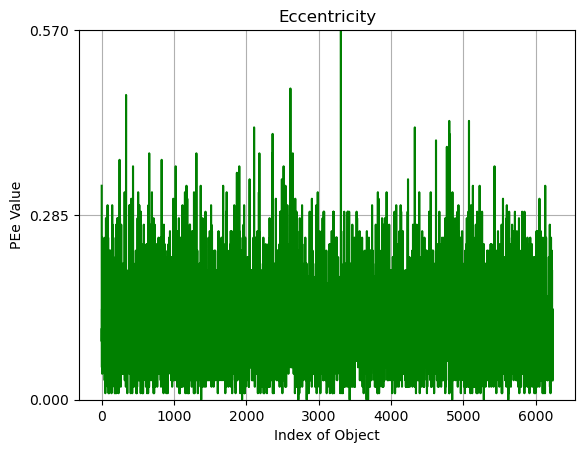

In [261]:
import matplotlib.pyplot as plt102
import numpy as np102
ys = [obj.PEe for obj in MylistOfSB]
res = [float(ele) for ele in ys]
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt102.title("Eccentricity")
plt102.xlabel("Index of Object")
plt102.ylabel("PEe Value")
plt102.ylim(min_pea, max_pea)
plt102.grid(True)
yticks = np102.linspace(float(min_pea), float(max_pea), 3)
plt102.yticks(yticks)
plt102.plot(res, color='g')
plt102.show()

### 11 Absolute magnitude       -PEH           -mag

 
11.0
13.0


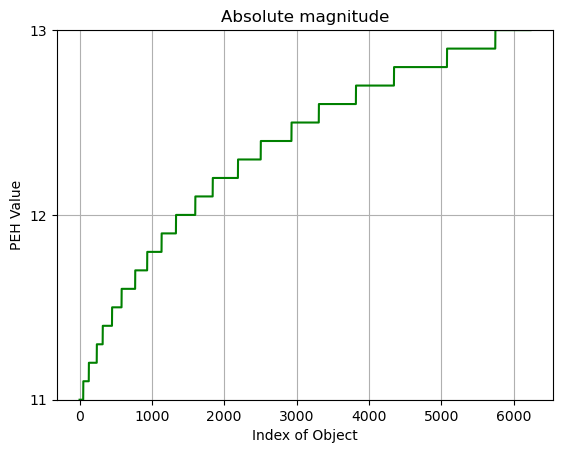

In [263]:
import matplotlib.pyplot as plt111
import numpy as np111
ys = [obj.PEH for obj in MylistOfSB]
res = [float(ele) for ele in ys]
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt111.title("Absolute magnitude")
plt111.xlabel("Index of Object")
plt111.ylabel("PEH Value")
plt111.ylim(min_pea, max_pea)
plt111.grid(True)
yticks = np111.linspace(float(min_pea), float(max_pea), 3)
plt111.yticks(yticks)
plt111.plot(res, color='g')
plt111.show()

###SemiMajor Axis vs inclination

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(5, 17, 'Torjans')

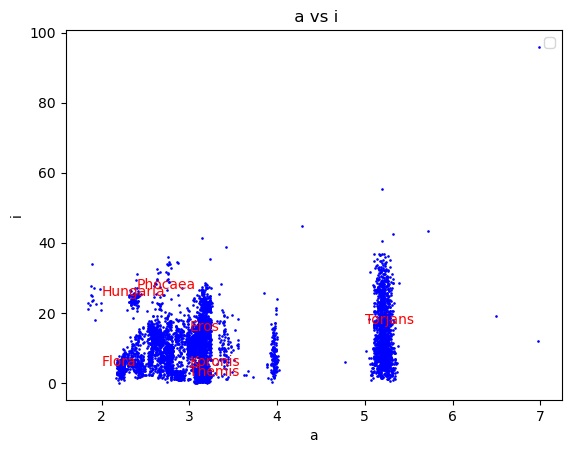

In [265]:
import matplotlib.pyplot as plt300
from scipy.stats import linregress
# Convert the data into arrays
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]
# Add labels and title
plt300.xlabel("a")
plt300.ylabel("i")
plt300.title(" a vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=0.8, color='blue', label='Data points')
plt300.text(2, 5, 'Flora', fontsize = 10, color ='red')
plt300.text(2, 25, 'Hungaria',  fontsize = 10, color ='red')
plt300.text(2.4, 27, 'Phocaea', fontsize = 10, color ='red')
plt300.text(3, 15, 'Eros', fontsize = 10, color ='red')
plt300.text(3, 5, 'Koronis', fontsize = 10, color ='red')
plt300.text(3, 2, 'Themis',  fontsize = 10, color ='red')
plt300.text(5, 17, 'Torjans', fontsize = 10, color ='red')

Show the plot

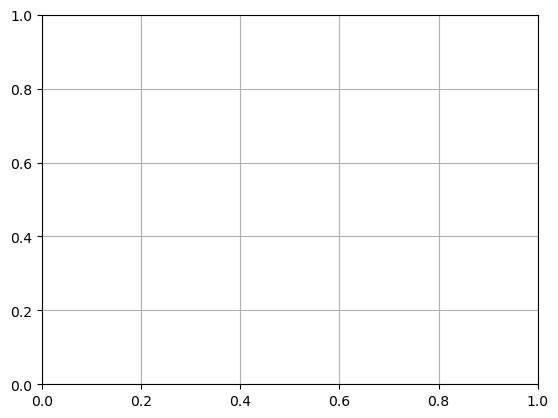

In [267]:
plt300.grid(True)
plt300.show()

### eccentricity vs inclination

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


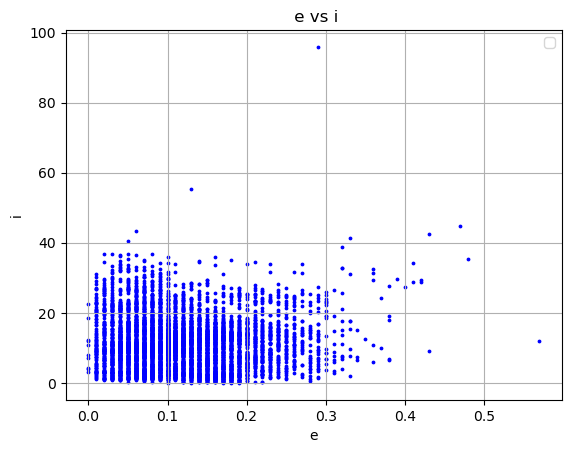

In [269]:
import matplotlib.pyplot as plt300
from scipy.stats import linregress
# Convert the data into arrays
xs = [obj.PEe for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]
# Add labels and title
plt300.xlabel("e")
plt300.ylabel("i")
plt300.title(" e vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=3, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

########## SemiMajor axis distribution 

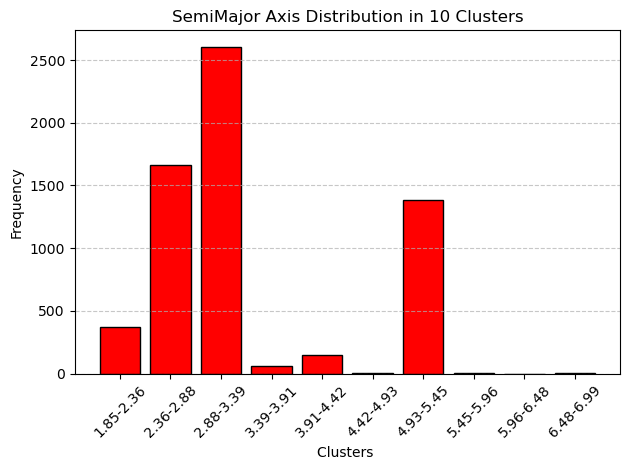

In [271]:
import numpy as np
# Extract y values
y_values = [float(obj.PEa) for obj in MylistOfSB]
# Define number of clusters (bins)
num_clusters = 10
# Get cluster edges (equal intervals) and cluster data
bins = np.linspace(min(y_values), max(y_values), num_clusters + 1)
hist, edges = np.histogram(y_values, bins=bins)
edges_rounded = [round(edge, 2) for edge in edges]
# Plot the histogram
plt300.bar(range(num_clusters), hist, color='red', width=0.8, align='center', edgecolor='black')
# Customize x-axis labels to show bin ranges
bin_labels = [f"{edges_rounded[i]:.2f}-{edges_rounded[i+1]:.2f}" for i in range(len(edges_rounded) - 1)]
plt300.xticks(range(num_clusters), bin_labels, rotation=45)
# Add titles and labels
plt300.title("SemiMajor Axis Distribution in 10 Clusters")
plt300.xlabel("Clusters ")
plt300.ylabel("Frequency")
plt300.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt300.tight_layout()
plt300.show()

########## eccentricity distribution 

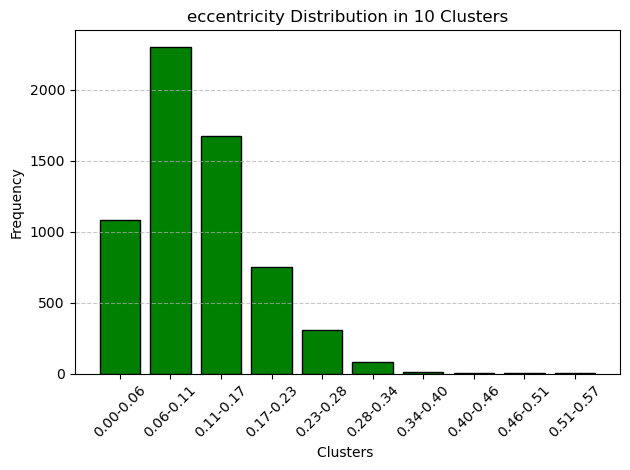

In [273]:
import numpy as np
# Extract y values
y_values = [float(obj.PEe) for obj in MylistOfSB]
# Define number of clusters (bins)
num_clusters = 10
# Get cluster edges (equal intervals) and cluster data
bins = np.linspace(min(y_values), max(y_values), num_clusters + 1)
hist, edges = np.histogram(y_values, bins=bins)
edges_rounded = [round(edge, 2) for edge in edges]
# Plot the histogram
plt300.bar(range(num_clusters), hist, color='green', width=0.8, align='center', edgecolor='black')
# Customize x-axis labels to show bin ranges
bin_labels = [f"{edges_rounded[i]:.2f}-{edges_rounded[i+1]:.2f}" for i in range(len(edges_rounded) - 1)]
plt300.xticks(range(num_clusters), bin_labels, rotation=45)
# Add titles and labels
plt300.title("eccentricity Distribution in 10 Clusters")
plt300.xlabel("Clusters ")
plt300.ylabel("Frequency")
plt300.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt300.tight_layout()
plt300.show()

## dual axis<br>
##import matplotlib.pyplot as plt<br>
##import numpy as np<br>
Example data generation (replace with actual data from MylistOfSB)

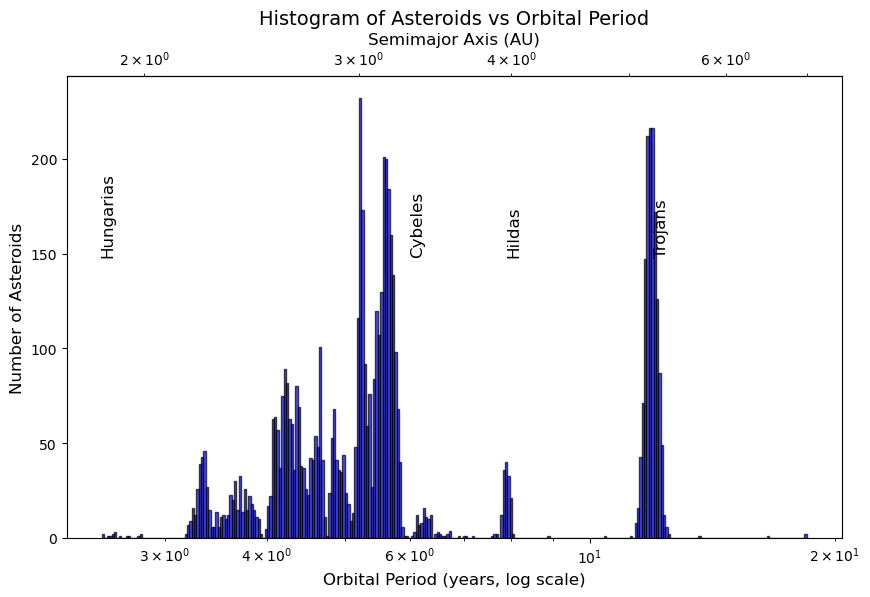

In [275]:
np.random.seed(42)  # For reproducibility
n_asteroids = len(MylistOfSB)
SMAxis = [float(obj.PEa) for obj in MylistOfSB]
MyPeriod = [float(obj.PEP) for obj in MylistOfSB]
# Replace these with your actual data:
####SMAxis = np.random.uniform(2, 4, n_asteroids)  # Semimajor axis in AU
#####MyPeriod = SMAxis ** (3/2)  # Period in years (Kepler's 3rd law approximation)
# Plot the histogram
fig, ax1 = plt300.subplots(figsize=(10, 6))
# Logarithmic bins for the period
bins = np.logspace(np.log10(min(MyPeriod)), np.log10(max(MyPeriod)), 300)
ax1.hist(MyPeriod, bins=bins, color='blue', alpha=0.7, edgecolor='black')
# Set logarithmic scale for the x-axis (period)
ax1.set_xscale('log')
ax1.set_xlabel("Orbital Period (years, log scale)", fontsize=12)
ax1.set_ylabel("Number of Asteroids", fontsize=12)
ax1.set_title("Histogram of Asteroids vs Orbital Period", fontsize=14)
# Adding a secondary axis for the semimajor axis
def period_to_semimajor_axis(period):
    """Convert orbital period to semimajor axis using Kepler's third law."""
    return period ** (2/3)
def semimajor_axis_to_period(semimajor_axis):
    """Convert semimajor axis to orbital period using Kepler's third law."""
    return semimajor_axis ** (3/2)
ax2 = ax1.secondary_xaxis("top", functions=(period_to_semimajor_axis, semimajor_axis_to_period))
ax2.set_xlabel("Semimajor Axis (AU)", fontsize=12)
plt300.text(2.5, 150, 'Hungarias', rotation=90, fontsize = 12)
plt300.text(6, 150, 'Cybeles', rotation=90, fontsize = 12)
plt300.text(7.9, 150, 'Hildas', rotation=90, fontsize = 12)
plt300.text(12, 150, 'Trojans', rotation=90, fontsize = 12)
# Show the plot
#### plt300.tight_layout()
plt300.show()